In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("/content/nlp_data_with_multiclass_sentiment_512.csv")
df2 = pd.read_csv("/content/nlp_data_with_multiclass_sentiment_128.csv")
df3 = pd.read_csv("/content/nlp_data_with_emotions_512.csv")

In [3]:
# Get unique values in the 'Sentiment' column of df1
unique_sentiments_df1 = df1['Sentiment'].unique()
print(unique_sentiments_df1)

# Get unique values in the 'Sentiment' column of df2
unique_sentiments_df2 = df2['Sentiment'].unique()
print(unique_sentiments_df2)

# Get unique values in the 'Emotion' column of df3
unique_emotions_df3 = df3['Emotion'].unique()
print(unique_emotions_df3)

['2 stars' '1 star' '4 stars' '3 stars' '5 stars']
['1 star' '4 stars' '3 stars' '5 stars' '2 stars']
['neutral' 'anger' 'joy' 'fear' 'surprise' 'sadness' 'disgust']


In [4]:
sentiment_mapping = {
    "1 star" : "Very Negative Sentiment",
    "2 stars" : "Negative Sentiment",
    "3 stars" : "Neutral Sentiment",
    "4 stars" : "Positive Sentiment",
    "5 stars" : "Very Positive Sentiment"
}

# Replace star ratings with corresponding sentiment labels
df1["Sentiment"] = df1["Sentiment"].map(sentiment_mapping)
df2["Sentiment"] = df2["Sentiment"].map(sentiment_mapping)

In [5]:
# Calculate the count of each sentiment type per year
sentiment_counts_512 = df1.groupby(["year", "Sentiment"]).size().unstack(fill_value=0)
sentiment_counts_128 = df2.groupby(["year", "Sentiment"]).size().unstack(fill_value=0)
emotion_counts = df3.groupby(["year", "Emotion"]).size().unstack(fill_value=0)

In [7]:
# Convert counts to percentages
sentiment_percentages_512 = sentiment_counts_512.div(sentiment_counts_512.sum(axis=1), axis=0) * 100

sentiment_percentages_512 = sentiment_percentages_512[["Very Negative Sentiment", "Negative Sentiment", "Neutral Sentiment", "Positive Sentiment", "Very Positive Sentiment"]]

# Convert counts to percentages
sentiment_percentages_128 = sentiment_counts_128.div(sentiment_counts_128.sum(axis=1), axis=0) * 100

sentiment_percentages_128 = sentiment_percentages_128[["Very Negative Sentiment", "Negative Sentiment", "Neutral Sentiment", "Positive Sentiment", "Very Positive Sentiment"]]

# Convert counts to percentages
emotion_percentages = emotion_counts.div(emotion_counts.sum(axis=1), axis=0) * 100

emotion_percentages = emotion_percentages[["fear", "sadness", "anger", "disgust", "neutral", "surprise", "joy"]]

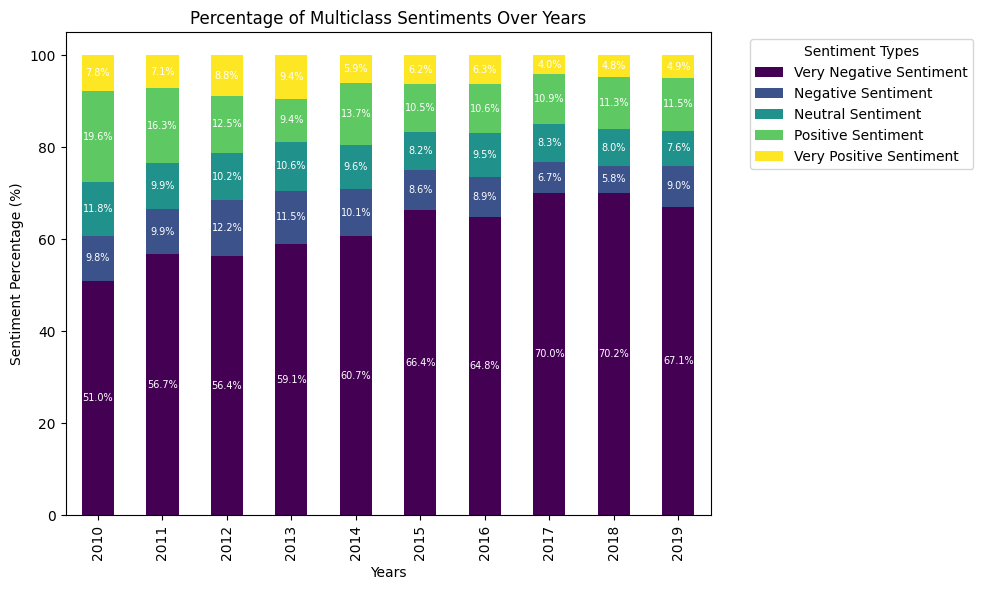

In [8]:
# Plot the stacked bar chart
ax = sentiment_percentages_512.plot(kind = "bar", stacked = True, colormap = "viridis", figsize = (10, 6))

# Add percentage labels within each bar segment
for i, year in enumerate(sentiment_percentages_512.index):
    cumulative_sum = 0
    for sentiment in sentiment_percentages_512.columns:
        percentage = sentiment_percentages_512.loc[year, sentiment]
        if percentage > 0:  # Only label if the percentage is greater than 0
            ax.text(
                i,  # X coordinate
                cumulative_sum + percentage / 2,  # Y coordinate (middle of the bar segment)
                f"{percentage:.1f}%",  # Display percentage with 1 decimal place
                ha = "center", va = "center", color = "white", fontsize = 7
            )
        cumulative_sum += percentage

# Customize the chart
plt.title("Percentage of Multiclass Sentiments Over Years")
plt.xlabel("Years")
plt.ylabel("Sentiment Percentage (%)")
plt.legend(title = "Sentiment Types", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()

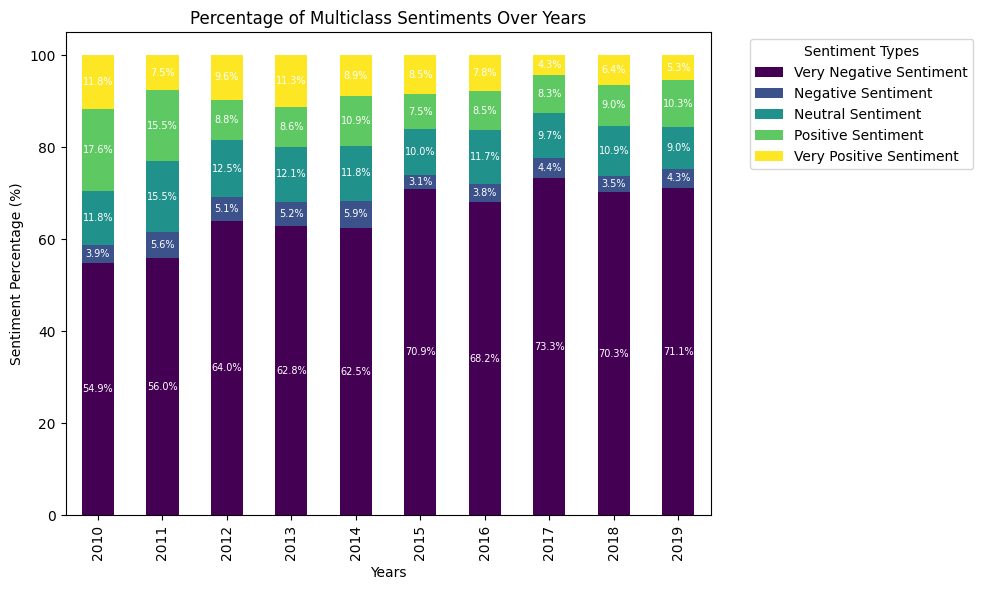

In [9]:
# Plot the stacked bar chart
ax = sentiment_percentages_128.plot(kind = "bar", stacked = True, colormap = "viridis", figsize=(10, 6))

# Add percentage labels within each bar segment
for i, year in enumerate(sentiment_percentages_128.index):
    cumulative_sum = 0
    for sentiment in sentiment_percentages_128.columns:
        percentage = sentiment_percentages_128.loc[year, sentiment]
        if percentage > 0:  # Only label if the percentage is greater than 0
            ax.text(
                i,  # X coordinate
                cumulative_sum + percentage / 2,  # Y coordinate (middle of the bar segment)
                f"{percentage:.1f}%",  # Display percentage with 1 decimal place
                ha = "center", va = "center", color = "white", fontsize = 7
            )
        cumulative_sum += percentage

# Customize the chart
plt.title("Percentage of Multiclass Sentiments Over Years")
plt.xlabel("Years")
plt.ylabel("Sentiment Percentage (%)")
plt.legend(title = "Sentiment Types", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()

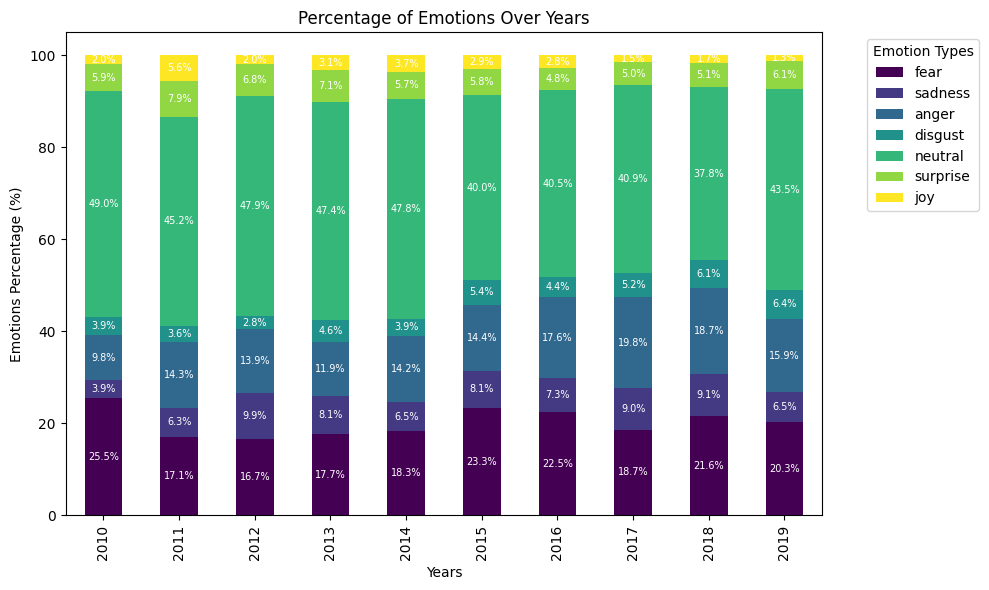

In [10]:
# Plot the stacked bar chart
ax = emotion_percentages.plot(kind = "bar", stacked = True, colormap = "viridis", figsize = (10, 6))

# Add percentage labels within each bar segment
for i, year in enumerate(emotion_percentages.index):
    cumulative_sum = 0
    for emotion in emotion_percentages.columns:
        percentage = emotion_percentages.loc[year, emotion]
        if percentage > 0:  # Only label if the percentage is greater than 0
            ax.text(
                i,  # X coordinate
                cumulative_sum + percentage / 2,  # Y coordinate (middle of the bar segment)
                f"{percentage:.1f}%",  # Display percentage with 1 decimal place
                ha = "center", va = "center", color = "white", fontsize = 7
            )
        cumulative_sum += percentage

# Customize the chart
plt.title("Percentage of Emotions Over Years")
plt.xlabel("Years")
plt.ylabel("Emotions Percentage (%)")
plt.legend(title = "Emotion Types", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()